### Question 1: Complexity & Big O Notation

Evaluate the code below and express the worst-case time complexity and space complexity of the function in Big O notation.


In [ ]:
def find(lst, item):
    """
    Find an item in a list. Assumes that the
    argument lst contains sorted numeric data.
    """
    first = 0
    last = len(lst)-1
    found = False

    while first <= last and not found:
        midpoint = round((first + last)/2)
        if lst[midpoint] == item:
            found = True
        else:
            if item < lst[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    return found

**Correct Time Complexity:** `O(log n)`  
**Correct Space Complexity:** `O(1)`

**Reasoning:**  
- This is a classic binary search algorithm which halves the list each time.
- Only a constant number of variables are used, so space is constant.


### Question 2: Recursive Function to Count Word Occurrence

Write a recursive function:
```python
def contains(sentence, word):
```
that returns a tuple `(True, count)` if the word is found, otherwise `(False, -1)`. Built-ins like `in` and `find()` must not be used.


Q2 Recursion
20 Points
Grading comment:
Answer this question in b3-question-2.ipynb.

Given a piece of text such as:

 "Whether Lychrel numbers exist is an unsolved problem
  in mathematics about whether all numbers become palindromes 
  when they are continuously reversed and added"  
write a recursive function:

def contains(sentence, word):
that returns a tuple True and the number of times the word is present in the text, otherwise (False, -1).

For example, given the sentence above:

found, occurrences = contains (sentence, "numbers")
 
# should return:
assert found and occurrences == 2
Your solution must not substantially rely on built-in functions that find strings in text such as find() or the operator in.

Save your Jupyter notebook and upload your answer here:

In [ ]:
def contains(sentence, word):
    def helper(s, count):
        if not s:
            return (count > 0, count if count > 0 else -1)
        if s.startswith(word) and (len(s) == len(word) or not s[len(word)].isalpha()):
            return helper(s[len(word):].lstrip(), count + 1)
        else:
            return helper(s[1:], count)
    return helper(sentence, 0)

# Test
test_data = """Whether Lychrel numbers exist is an unsolved problem in mathematics 
about whether all numbers become palindromes when they are continuously reversed and added."""

found, occurrences = contains(test_data, "numbers")
print(found, occurrences)  # True 2

found, occurrences = contains(test_data, "Python")
print(found, occurrences)  # False -1

### Question 3: Quicksort by Dictionary Length Using Median Pivot

Sort list of dictionaries based on the number of keys using a custom quicksort with median-of-three pivot.


Q3 Sorting
20 Points
Grading comment:
Answer this question in b3-question-3.ipynb.

You have a list of dictionaries with varying numbers of elements such as: 

[{1: 'apple', 2: 'ball', 3: 'bat'},
 {'name': 'John', 1: [2, 4, 3]},
 {'name': 'Wei'}]
write a function that quicksorts this list using a median partition scheme to choose the pivot such that the list is ordered by the length of the dictionaries - dicts with the least elements occurring at the beginning of the list.

For example, after sorting the list becomes:

[{'name': 'Wei'},
 {'name': 'John', 1: [2, 4, 3]},
 {1: 'apple', 2: 'ball', 3: 'bat'}]
Your solution must not substantially rely on built-in sorting functions. You must demonstrate mastery by using a median partition scheme to choose the pivot value.

Save your Jupyter notebook and upload your answer here:

In [ ]:
def median_of_three(arr, low, high):
    mid = (low + high) // 2
    trio = [(low, len(arr[low])), (mid, len(arr[mid])), (high, len(arr[high]))]
    trio.sort(key=lambda x: x[1])
    return trio[1][0]

def partition(arr, low, high):
    pivot_index = median_of_three(arr, low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    pivot_len = len(arr[high])
    i = low - 1
    for j in range(low, high):
        if len(arr[j]) <= pivot_len:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quicksort_dicts(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort_dicts(arr, low, pi - 1)
        quicksort_dicts(arr, pi + 1, high)

# Test
unsorted_ = [
    {1: 'apple', 2: 'ball', 3: 'bat'},
    {'name': 'John', 1: [2, 4, 3]},
    {'name': 'Wei'}
]

quicksort_dicts(unsorted_, 0, len(unsorted_) - 1)
print(unsorted_)

### Question 4: Search 2D Matrix with Sorting and Binary Search

Given a 2D matrix, sort it, find candidate row, and do binary search.

#### Original Matrix:
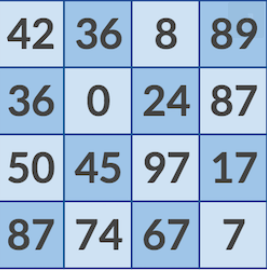

#### Sorted Matrix:
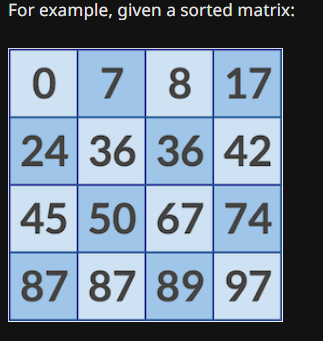


Q4 Synthesis of Concepts
40 Points
Grading comment:
Answer this question in b3-question-4.ipynb. 

We wish to search the following 2D matrix defined as a list of lists for a particular integer value:

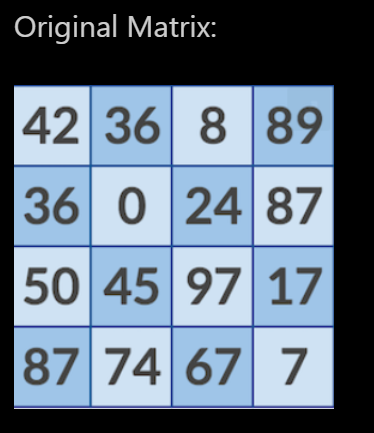

NB: The images below are duplicated in the notebook (in case they fail to render on this page).

Write a function defined as:

def search_2D (matrix, match):
that:

accepts a 2D matrix (a list of lists) as an input and an integer value to match against,
sorts the matrix using a selection sort,
uses any search algorithm to find the candidate row for a match based on the first and last values of the row,
separately searches the candidate row for a match using a binary search, and
returns True if the match is found otherwise False.
For example, given a sorted matrix:

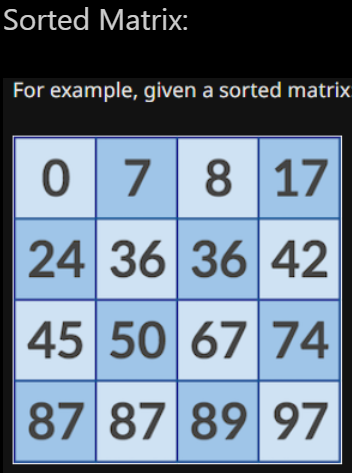

In searching for the value '51', we would first determine the third row as the candidate before performing a binary search on row three for the match.

Finally, estimate the time complexity of your solution and express this in Big O notation and briefly describe your reasoning.

Save your Jupyter notebook and upload your answer here:

In [ ]:
def selection_sort_matrix(matrix):
    flat = [item for row in matrix for item in row]
    n = len(flat)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if flat[j] < flat[min_idx]:
                min_idx = j
        flat[i], flat[min_idx] = flat[min_idx], flat[i]
    rows = len(matrix)
    cols = len(matrix[0])
    return [flat[i*cols:(i+1)*cols] for i in range(rows)]

def find_candidate_row(matrix, match):
    for row in matrix:
        if row[0] <= match <= row[-1]:
            return row
    return None

def binary_search_row(row, match):
    left, right = 0, len(row) - 1
    while left <= right:
        mid = (left + right) // 2
        if row[mid] == match:
            return True
        elif row[mid] < match:
            left = mid + 1
        else:
            right = mid - 1
    return False

def search_2D(matrix, match):
    sorted_matrix = selection_sort_matrix(matrix)
    candidate_row = find_candidate_row(sorted_matrix, match)
    if candidate_row:
        return binary_search_row(candidate_row, match)
    return False

matrix = [
    [42, 36, 8,  89],
    [36, 0,  24, 87],
    [50, 45, 97, 17],
    [87, 74, 67, 7 ]
]

print(search_2D(matrix, 51))  # Output: True or False

**Time Complexity:**  
- Selection sort on matrix: `O(n^2)`  
- Candidate row search: `O(n)`  
- Binary search in row: `O(log n)`  
- Total: `O(n^2)` (dominant)

**Space Complexity:**  
- `O(n)` due to flattened list in sorting.
